<a href="https://colab.research.google.com/github/roshanappa/Time-Series-Analysis-Projects-/blob/master/Multiple_Time_Series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from zipfile import ZipFile

In [6]:
with ZipFile(file='/content/409180_783762_bundle_archive.zip',mode='r') as zip:
 zip.extractall()
 print('Done')

Done


In [9]:
!ls /content/

409180_783762_bundle_archive.zip
PRSA_Data_Aotizhongxin_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv
PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Wanshouxigong_20130301-20170228.csv
sample_data


WE have mutiple time series are avalible.Each Time-Series having the diffrent location details.

In order to manupated each and every It will time costly and need high computationa power.

In [16]:
from datetime import datetime
dateparse = lambda x: pd.datetime.strptime(x, '%Y %m %d %H')

In [17]:
data_Aotizhong = pd.read_csv('/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv',parse_dates=[['year','month','day','hour']],date_parser=dateparse)

In [20]:
data_Changping= pd.read_csv('/content/PRSA_Data_Changping_20130301-20170228.csv',parse_dates=[['year','month','day','hour']],date_parser=dateparse)

In [21]:
data_Dingling = pd.read_csv('/content/PRSA_Data_Dingling_20130301-20170228.csv',parse_dates=[['year','month','day','hour']],date_parser=dateparse)

In [22]:
data = pd.concat([data_Aotizhong,data_Changping,data_Dingling],ignore_index=True,sort=False)

In [23]:
data.head()

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01 01:00:00,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01 02:00:00,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-03-01 03:00:00,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [24]:
data.tail()

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
105187,2017-02-28 19:00:00,35060,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
105188,2017-02-28 20:00:00,35061,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
105189,2017-02-28 21:00:00,35062,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
105190,2017-02-28 22:00:00,35063,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling
105191,2017-02-28 23:00:00,35064,13.0,16.0,4.0,9.0,500.0,74.0,7.0,1009.4,-12.2,0.0,N,1.9,Dingling


In [25]:
data.drop(columns=['No'],inplace=True)

In [26]:
data.set_index('year_month_day_hour',inplace=True)

In [27]:
data.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [29]:
data1=data.groupby('station').resample('D').mean()

In [31]:
data1

PM2.5        PM10  ...  RAIN      WSPM
station      year_month_day_hour                          ...                
Aotizhongxin 2013-03-01             7.125000   10.750000  ...   0.0  3.254167
             2013-03-02            30.750000   42.083333  ...   0.0  1.479167
             2013-03-03            76.916667  120.541667  ...   0.0  1.658333
             2013-03-04            22.708333   44.583333  ...   0.0  2.404167
             2013-03-05           148.875000  183.791667  ...   0.0  1.129167
...                                      ...         ...  ...   ...       ...
Dingling     2017-02-24            12.666667   21.541667  ...   0.0  2.737500
             2017-02-25            13.125000   19.125000  ...   0.0  2.512500
             2017-02-26            26.583333   36.708333  ...   0.0  1.670833
             2017-02-27            52.333333   65.958333  ...   0.0  1.591667
             2017-02-28            13.125000   22.041667  ...   0.0  2.350000

[4383 rows x 11 columns]

In [32]:
data2 = data1.reset_index()
data2.head()

,station,year_month_day_hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,Aotizhongxin,2013-03-01,7.125000,10.750000,11.708333,22.583333,429.166667,63.875000,1.391667,1026.875000,-18.745833,0.0,3.254167
1,Aotizhongxin,2013-03-02,30.750000,42.083333,36.625000,66.666667,824.916667,29.750000,0.616667,1026.850000,-15.937500,0.0,1.479167
2,Aotizhongxin,2013-03-03,76.916667,120.541667,61.291667,81.000000,1620.625000,19.125000,5.566667,1014.608333,-12.316667,0.0,1.658333
3,Aotizhongxin,2013-03-04,22.708333,44.583333,22.869565,46.956522,617.391304,53.750000,9.962500,1017.650000,-11.683333,0.0,2.404167
4,Aotizhongxin,2013-03-05,148.875000,183.791667,93.875000,132.833333,2357.958333,68.458333,6.291667,1010.900000,-7.525000,0.0,1.129167


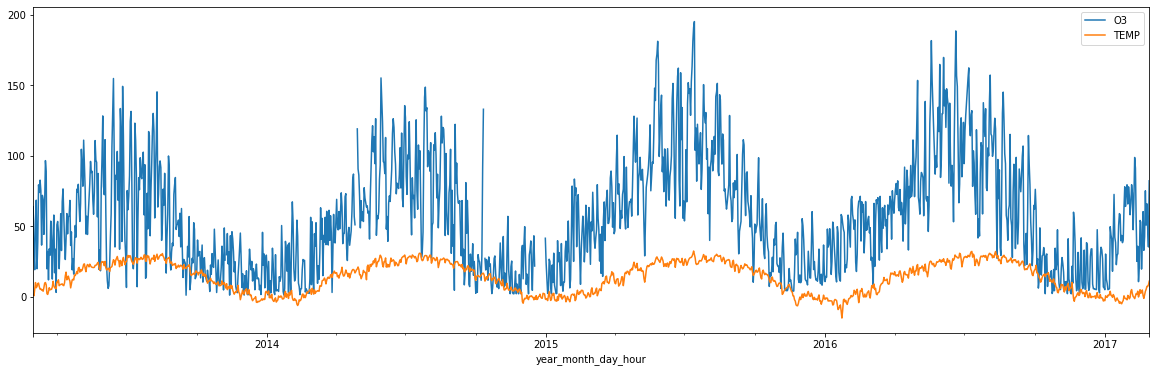

In [40]:
data2.set_index('year_month_day_hour').query("station=='Aotizhongxin'")[['O3','TEMP']].plot(figsize=(20,6))

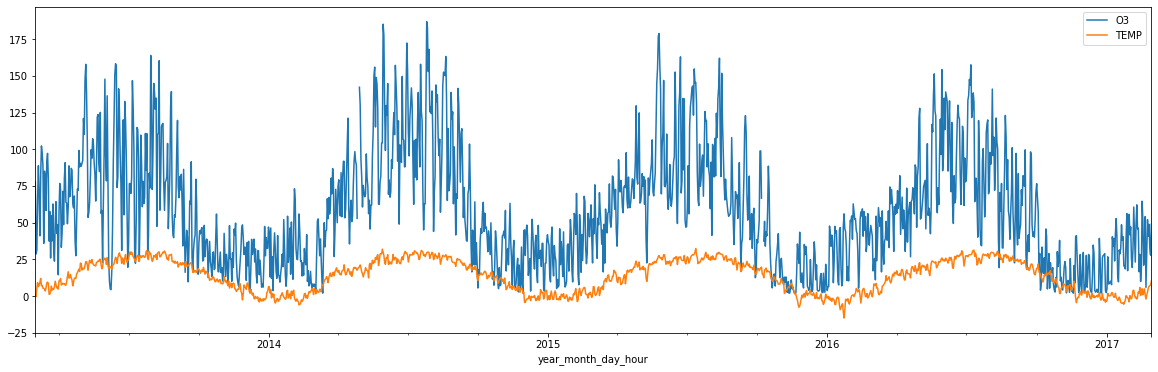

In [41]:
data2.set_index('year_month_day_hour').query("station=='Changping'")[['O3','TEMP']].plot(figsize=(20,6))

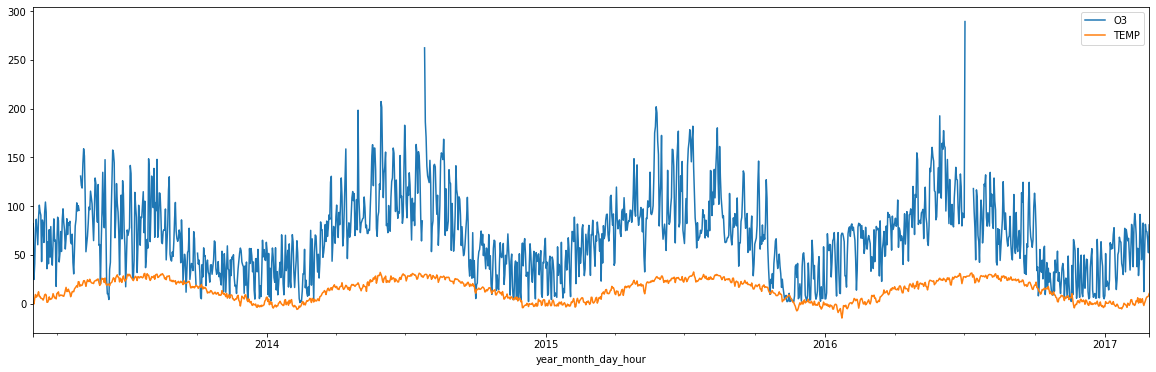

In [42]:
data2.set_index('year_month_day_hour').query("station=='Dingling'")[['O3','TEMP']].plot(figsize=(20,6))

station
Aotizhongxin    AxesSubplot(0.125,0.125;0.775x0.755)
Changping       AxesSubplot(0.125,0.125;0.775x0.755)
Dingling        AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

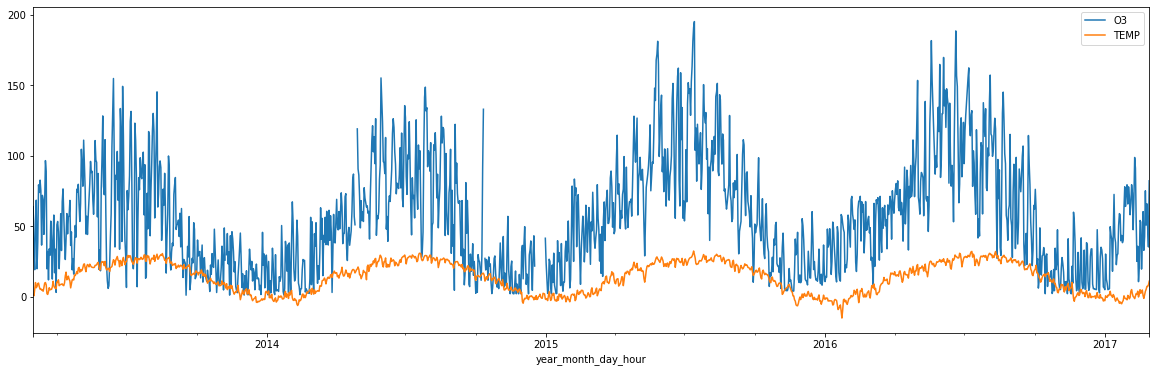

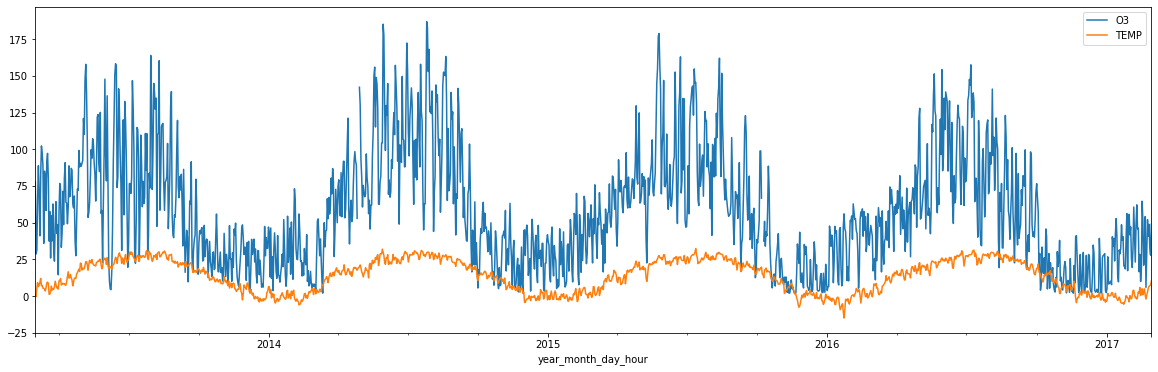

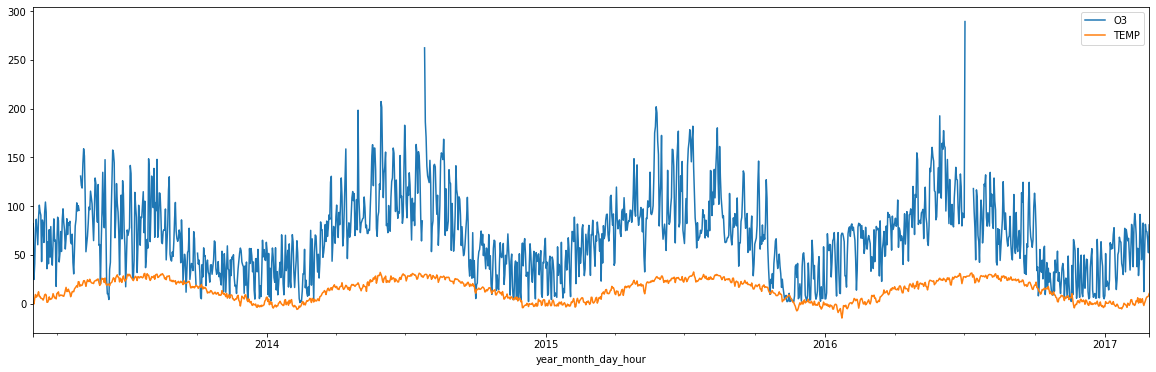

In [44]:
data2.set_index('year_month_day_hour').groupby('station')[['O3','TEMP']].plot(figsize=(20,6))

In [45]:
data2['station'].unique()

array(['Aotizhongxin', 'Changping', 'Dingling'], dtype=object)

In [55]:
data2

,station,ds,PM2.5,PM10,SO2,NO2,CO,y,TEMP,PRES,DEWP,RAIN,WSPM
0,Aotizhongxin,2013-03-01,7.125000,10.750000,11.708333,22.583333,429.166667,63.875000,1.391667,1026.875000,-18.745833,0.0,3.254167
1,Aotizhongxin,2013-03-02,30.750000,42.083333,36.625000,66.666667,824.916667,29.750000,0.616667,1026.850000,-15.937500,0.0,1.479167
2,Aotizhongxin,2013-03-03,76.916667,120.541667,61.291667,81.000000,1620.625000,19.125000,5.566667,1014.608333,-12.316667,0.0,1.658333
3,Aotizhongxin,2013-03-04,22.708333,44.583333,22.869565,46.956522,617.391304,53.750000,9.962500,1017.650000,-11.683333,0.0,2.404167
4,Aotizhongxin,2013-03-05,148.875000,183.791667,93.875000,132.833333,2357.958333,68.458333,6.291667,1010.900000,-7.525000,0.0,1.129167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,Dingling,2017-02-24,12.666667,21.541667,5.708333,8.708333,370.833333,74.416667,5.350000,1015.908333,-12.120833,0.0,2.737500
4379,Dingling,2017-02-25,13.125000,19.125000,4.791667,10.250000,437.500000,73.583333,6.737500,1013.820833,-10.187500,0.0,2.512500
4380,Dingling,2017-02-26,26.583333,36.708333,9.916667,23.625000,629.166667,65.291667,6.958333,1015.095833,-7.470833,0.0,1.670833
4381,Dingling,2017-02-27,52.333333,65.958333,12.125000,42.458333,712.500000,52.166667,7.612500,1012.050000,-7.483333,0.0,1.591667


## Model_Building

In [47]:
from fbprophet import Prophet

In [48]:
data2.columns

Index(['station', 'year_month_day_hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'],
      dtype='object')

In [49]:
data2.columns = ['station', 'ds', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'y', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

In [52]:
final_data = data2[['ds','y','TEMP','station']].copy()

In [56]:
final_data.head()

,ds,y,TEMP,station
0,2013-03-01,63.875000,1.391667,Aotizhongxin
1,2013-03-02,29.750000,0.616667,Aotizhongxin
2,2013-03-03,19.125000,5.566667,Aotizhongxin
3,2013-03-04,53.750000,9.962500,Aotizhongxin
4,2013-03-05,68.458333,6.291667,Aotizhongxin


In [70]:
stations = final_data.groupby('station')

In [75]:
stations.get_group('Aotizhongxin').head()

,ds,y,TEMP,station
0,2013-03-01,63.875000,1.391667,Aotizhongxin
1,2013-03-02,29.750000,0.616667,Aotizhongxin
2,2013-03-03,19.125000,5.566667,Aotizhongxin
3,2013-03-04,53.750000,9.962500,Aotizhongxin
4,2013-03-05,68.458333,6.291667,Aotizhongxin


In [82]:
for station in stations.groups:
  group = stations.get_group(station)
  train = group[((group['ds']>='2013-03-01') & (group['ds']<='2016-02-28'))]
  test  = group[group['ds']>'2016-02-28']

In [83]:
train.shape,test.shape

((1095, 4), (366, 4))

In [88]:
target = pd.DataFrame()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


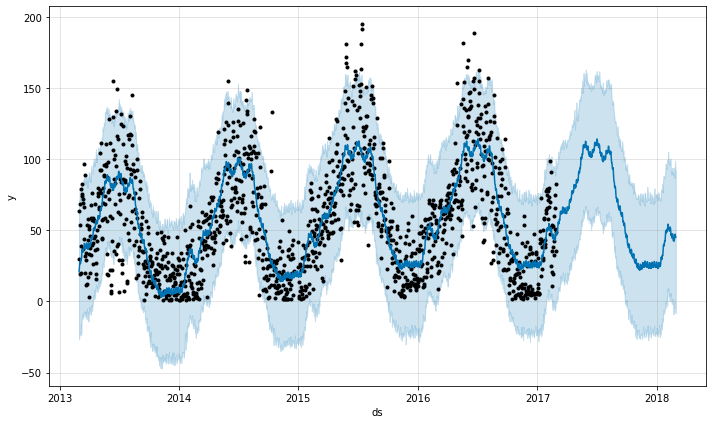

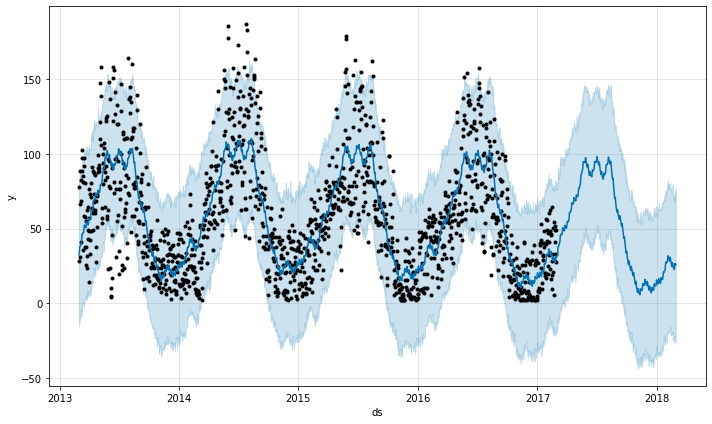

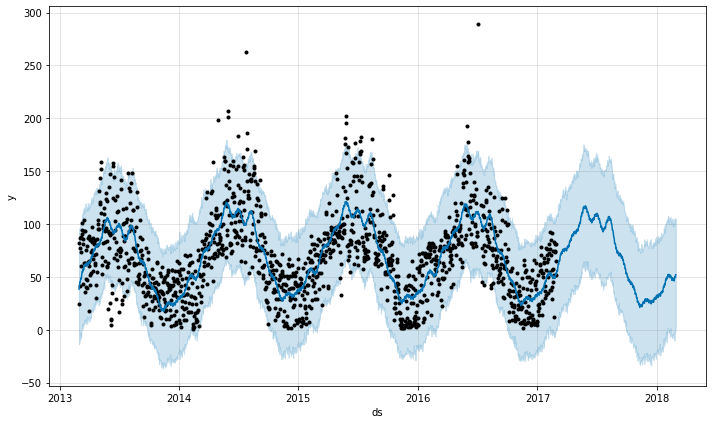

In [89]:
for station in stations.groups:
  group = stations.get_group(station)
  
  model = Prophet(interval_width=0.95)
  model.fit(group)
  future = model.make_future_dataframe(periods=365)
  forecast = model.predict(future)
  model.plot(forecast)
  forecast = forecast.rename(columns ={"yhat":'yhat'+station})
  target = pd.merge(target,forecast.set_index('ds'),how='outer',left_index=True,right_index=True)

In [91]:
target.head()

,trend_x,yhat_lower_x,yhat_upper_x,trend_lower_x,trend_upper_x,additive_terms_x,additive_terms_lower_x,additive_terms_upper_x,weekly_x,weekly_lower_x,weekly_upper_x,yearly_x,yearly_lower_x,yearly_upper_x,multiplicative_terms_x,multiplicative_terms_lower_x,multiplicative_terms_upper_x,yhatAotizhongxin,trend_y,yhat_lower_y,yhat_upper_y,trend_lower_y,trend_upper_y,additive_terms_y,additive_terms_lower_y,additive_terms_upper_y,weekly_y,weekly_lower_y,weekly_upper_y,yearly_y,yearly_lower_y,yearly_upper_y,multiplicative_terms_y,multiplicative_terms_lower_y,multiplicative_terms_upper_y,yhatChangping,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhatDingling
ds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01,38.348226,-26.842951,71.129283,38.348226,38.348226,-17.535625,-17.535625,-17.535625,-1.732265,-1.732265,-1.732265,-15.803360,-15.803360,-15.803360,0.0,0.0,0.0,20.812601,54.166828,-14.862275,81.871532,54.166828,54.166828,-21.770846,-21.770846,-21.770846,-1.496012,-1.496012,-1.496012,-20.274833,-20.274833,-20.274833,0.0,0.0,0.0,32.395982,54.650068,-13.880993,91.567732,54.650068,54.650068,-16.266307,-16.266307,-16.266307,-1.911112,-1.911112,-1.911112,-14.355194,-14.355194,-14.355194,0.0,0.0,0.0,38.383762
2013-03-02,38.372655,-24.129178,71.357057,38.372655,38.372655,-15.310217,-15.310217,-15.310217,-0.549901,-0.549901,-0.549901,-14.760316,-14.760316,-14.760316,0.0,0.0,0.0,23.062438,54.182816,-13.293794,82.755200,54.182816,54.182816,-19.743706,-19.743706,-19.743706,-0.416470,-0.416470,-0.416470,-19.327236,-19.327236,-19.327236,0.0,0.0,0.0,34.439110,54.680734,-12.294966,95.710656,54.680734,54.680734,-13.243160,-13.243160,-13.243160,-0.092852,-0.092852,-0.092852,-13.150308,-13.150308,-13.150308,0.0,0.0,0.0,41.437574
2013-03-03,38.397084,-22.433689,79.956073,38.397084,38.397084,-11.300547,-11.300547,-11.300547,2.336808,2.336808,2.336808,-13.637355,-13.637355,-13.637355,0.0,0.0,0.0,27.096536,54.198803,-11.716438,90.168983,54.198803,54.198803,-16.308530,-16.308530,-16.308530,1.983485,1.983485,1.983485,-18.292015,-18.292015,-18.292015,0.0,0.0,0.0,37.890273,54.711400,-10.478922,96.423501,54.711400,54.711400,-10.825726,-10.825726,-10.825726,1.032236,1.032236,1.032236,-11.857962,-11.857962,-11.857962,0.0,0.0,0.0,43.885674
2013-03-04,38.421513,-23.233043,74.636858,38.421513,38.421513,-10.413050,-10.413050,-10.413050,2.041640,2.041640,2.041640,-12.454690,-12.454690,-12.454690,0.0,0.0,0.0,28.008463,54.214791,-10.162793,85.875479,54.214791,54.214791,-16.134729,-16.134729,-16.134729,1.050948,1.050948,1.050948,-17.185676,-17.185676,-17.185676,0.0,0.0,0.0,38.080063,54.742066,-7.743621,94.214859,54.742066,54.742066,-9.488377,-9.488377,-9.488377,1.008114,1.008114,1.008114,-10.496492,-10.496492,-10.496492,0.0,0.0,0.0,45.253688
2013-03-05,38.445942,-21.784767,73.883288,38.445942,38.445942,-11.943825,-11.943825,-11.943825,-0.710259,-0.710259,-0.710259,-11.233567,-11.233567,-11.233567,0.0,0.0,0.0,26.502116,54.230779,-9.502127,85.889818,54.230779,54.230779,-16.117362,-16.117362,-16.117362,-0.091310,-0.091310,-0.091310,-16.026052,-16.026052,-16.026052,0.0,0.0,0.0,38.113417,54.772732,-2.680423,99.143059,54.772732,54.772732,-9.961363,-9.961363,-9.961363,-0.875692,-0.875692,-0.875692,-9.085671,-9.085671,-9.085671,0.0,0.0,0.0,44.811368


In [93]:
target = target[['yhat'+ station for station in stations.groups.keys()]]

In [94]:
target

,yhatAotizhongxin,yhatChangping,yhatDingling
ds,,,
2013-03-01,20.812601,32.395982,38.383762
2013-03-02,23.062438,34.439110,41.437574
2013-03-03,27.096536,37.890273,43.885674
2013-03-04,28.008463,38.080063,45.253688
2013-03-05,26.502116,38.113417,44.811368
...,...,...,...
2018-02-24,43.785262,23.937561,48.316631
2018-02-25,47.045731,26.629867,49.974357
2018-02-26,47.273621,26.125763,50.625985


In [100]:
a=final_data.set_index('ds').query("station=='Aotizhongxin'")['y']
b=target['yhatAotizhongxin']

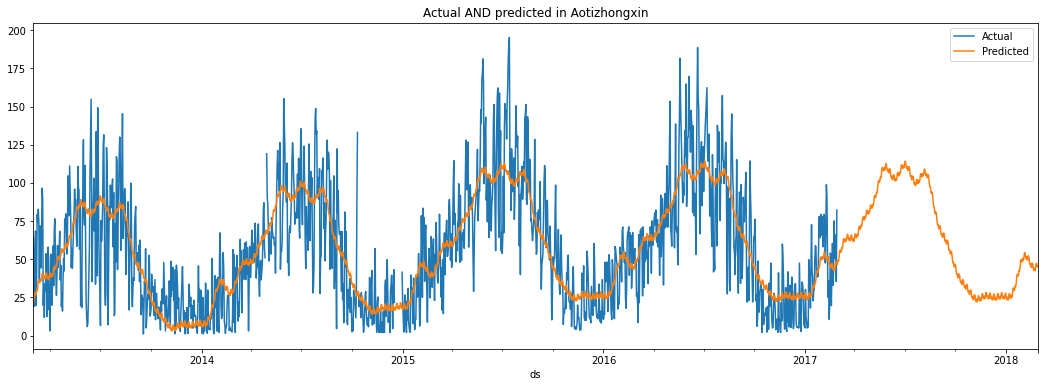

In [101]:
dataframe = pd.concat([a,b],axis=1)
dataframe.columns=['Actual','Predicted']
dataframe.plot(figsize=(18,6),title='Actual AND predicted in Aotizhongxin')
plt.show()

In [102]:
a=final_data.set_index('ds').query("station=='Changping'")['y']
b=target['yhatChangping']

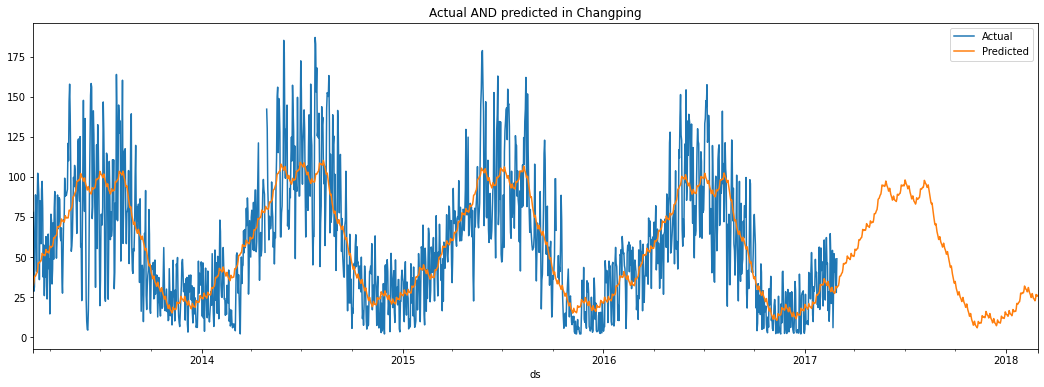

In [103]:
dataframe = pd.concat([a,b],axis=1)
dataframe.columns=['Actual','Predicted']
dataframe.plot(figsize=(18,6),title='Actual AND predicted in Changping')
plt.show()

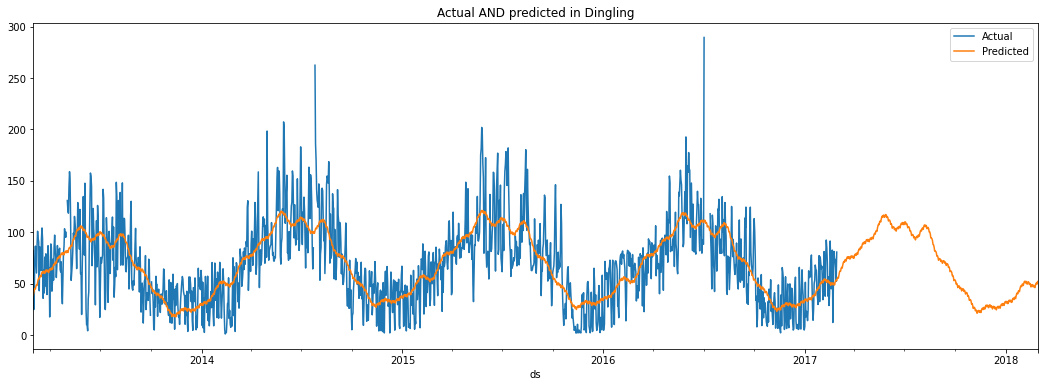

In [105]:
a=final_data.set_index('ds').query("station=='Dingling'")['y']
b=target['yhatDingling']
dataframe = pd.concat([a,b],axis=1)
dataframe.columns=['Actual','Predicted']
dataframe.plot(figsize=(18,6),title='Actual AND predicted in Dingling')
plt.show()

We can use the Temp as by using `add_regressor`.This is how wwe can add the mutipile time series analysis in one time.

## Thank You !!